<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Statistical-Data-Analysis-2/blob/master/LAB_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAD2 lab10:** Sampling methods

Sampling is essential in statistical data analysis; many tasks rely on obtaining representative draws from a probability distribution $p(x)$ instead of a single estimate. This appears in applications such as Bayesian posterior inference and in latent-variable models like variational autoencoders. When $p(x)$ is simple, we can sample using **inverse transform sampling**, where $u \sim \text{Uniform}(0,1)$ is mapped to $x = F^{-1}(u)$, where $F$ denotes the cumulative distribution function. But most practical distributions lack a closed-form or invertible CDF, so inverse sampling is unusable. In such cases, methods like rejection sampling, importance sampling, and Markov chain Monte Carlo provide practical ways to obtain approximate samples.

### **Rejection sampling**

Rejection Sampling is a simple method to generate samples from a complicated **target distribution** $p(x)$ when direct sampling is difficult. The key idea is to use a simpler **proposal distribution** $q(x)$ that we can easily sample from and that “envelops” $p(x)$ up to a constant.

Formally, we require a constant $M > 0$ such that  

$$
p(x) \le M q(x) \quad \text{for all } x.
$$  

The algorithm works as follows:  

1. Sample $x^* \sim q(x)$.  
2. Draw $u \sim \text{Uniform}(0,1)$.  
3. Accept $x^*$ as a sample from $p(x)$ if  

$$
u \le \frac{p(x^*)}{M q(x^*)},  
$$  

otherwise reject it and repeat.

Note: In practice, we often do not need the exact $p(x)$ and can instead use a function $f(x)$ that is proportional to $p(x)$, i.e., $p(x) = Cf(x)$ for some constant $C$.


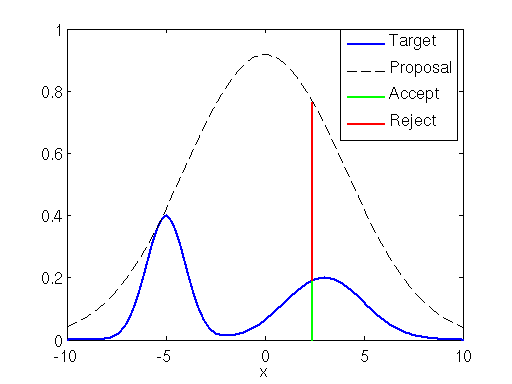

Rejection sampling is simple and guarantees exact samples from $p(x)$, but **it can be inefficient if $M$ is large or if $q(x)$ poorly approximates $p(x)$**, because many candidates may be rejected.

### Exercise 1: Rejection sampling

Draw 10,000 samples from the target distribution  

$$
p(x) \propto f(x) = e^{\frac{-x^2}{2}}\big(\sin^2(x+6)\cos^2(x)\sin^2(4x)+1\big)
$$  

using rejection sampling.

Use the following proposal distributions:

a) Uniform $q(x) = \text{Unif}(-4,4)$  
b) Normal $q(x) = \mathcal{N}(0, 1)$

Steps:  

1. Plot the target and proposal distributions on the same graph.

2. For each proposal distribution, determine a suitable scaling constant $M$. Plot $p(x)$ and the scaled proposals $M q(x)$ together to verify that the envelope covers the target distribution.

   Hint: calculate the ratio $f(x)/q(x)$ to determine $M$  

3. Implement rejection sampling.

4. Draw 10,000 samples using both proposal distributions. Count the acceptance rate (number of samples/number of trials) for each $q(x)$.  

5. Plot a histogram or density estimate of the accepted samples drawn using each proposal. Does the quality of sampling depend on a proposal distribution?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# define the unnormalized target distribution.
def target_distribution(x):
    return np.exp(-x**2 / 2) * (np.sin(6 + x)**2 + 3 * np.cos(x)**2 * np.sin(4 * x)**2 + 1)

# plot target, uniform and normal distributions
...

# find scaling constants for uniform and normal proposals
...

# plot target and scaled proposals to confirm that they envelope the target well
...

In [ ]:
def rejection_sampling(n_samples, M, normal_proposal: bool = True):

  # TODO

  return samples

# draw 10000 samples using normal proposal
...
# draw 10000 samples using uniform proposal
...

In [ ]:
# plot histograms with obtained samples
...

Rejection sampling can be very effective even for complicated target distributions, but its success depends critically on choosing a good proposal distribution that closely envelopes the target. When the proposal does not match the target well, the required scaling constant $M$ becomes large, which drastically reduces the acceptance rate. This challenge becomes especially severe in high-dimensional settings, where most proposals fail to overlap well with the regions where the target density has significant mass, making it nearly impossible to find a reasonable $M$. But similar problems can also arise in one dimension: if the target has very sharp peaks, heavy tails, or many separated modes, constructing a proposal that covers the entire density without wasting large amounts of probability mass is difficult.

In both 1D and multidimensional cases, **the core limitation is the same: finding a proposal that is both easy to sample from and tightly bounds the target**. When this fails, rejection sampling becomes inefficient, while MCMC methods often remain practical.